In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

# Comprehensive rcParams for publication-ready neurips paper - SET ONCE
plt.rcParams.update({
    'font.size': 24,
    'axes.labelsize': 28,
    'axes.titlesize': 30,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 22,
    'lines.linewidth': 3,
    'lines.markersize': 12,
    'lines.markeredgewidth': 2.5,
    'legend.frameon': False,
    'figure.dpi': 300,
    'font.weight': 'normal',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'grid.alpha': 0.3,
    'grid.linewidth': 1,
    'figure.figsize': (20, 6),
    'axes.grid': True,
})

print("Consistent matplotlib style applied for publication-ready plots")


Consistent matplotlib style applied for publication-ready plots


In [2]:
# Load only the necessary columns to save memory
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read only required columns
df = pd.read_csv('../data/khaki_soybeans/khaki_multi_crop_yield.csv', usecols=['year', 'corn_yield', 'soybean_yield', 'winter_wheat_yield'])

# Calculate mean yields by year
yearly_means = df.groupby('year').agg({
    'corn_yield': 'mean',
    'soybean_yield': 'mean',
    'winter_wheat_yield': 'mean'
}).reset_index()

print("Data loaded and yearly means calculated.")
print(f"Year range: {yearly_means['year'].min()} to {yearly_means['year'].max()}")
print(f"Number of years: {len(yearly_means)}")
print("\nFirst few rows of calculated means:")
print(yearly_means.head())

Data loaded and yearly means calculated.
Year range: 1980.0 to 2018.0
Number of years: 39

First few rows of calculated means:
     year  corn_yield  soybean_yield  winter_wheat_yield
0  1980.0   78.659455      28.879274           43.180368
1  1981.0  107.457500      33.359265           39.532344
2  1982.0  106.638244      32.853571           36.909172
3  1983.0   72.624269      26.855117           43.237168
4  1984.0   99.296952      27.460087           40.931268


/var/folders/gl/0n1kdnzj6h9690m2clm0274h0000gn/T/ipykernel_86866/1361155864.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


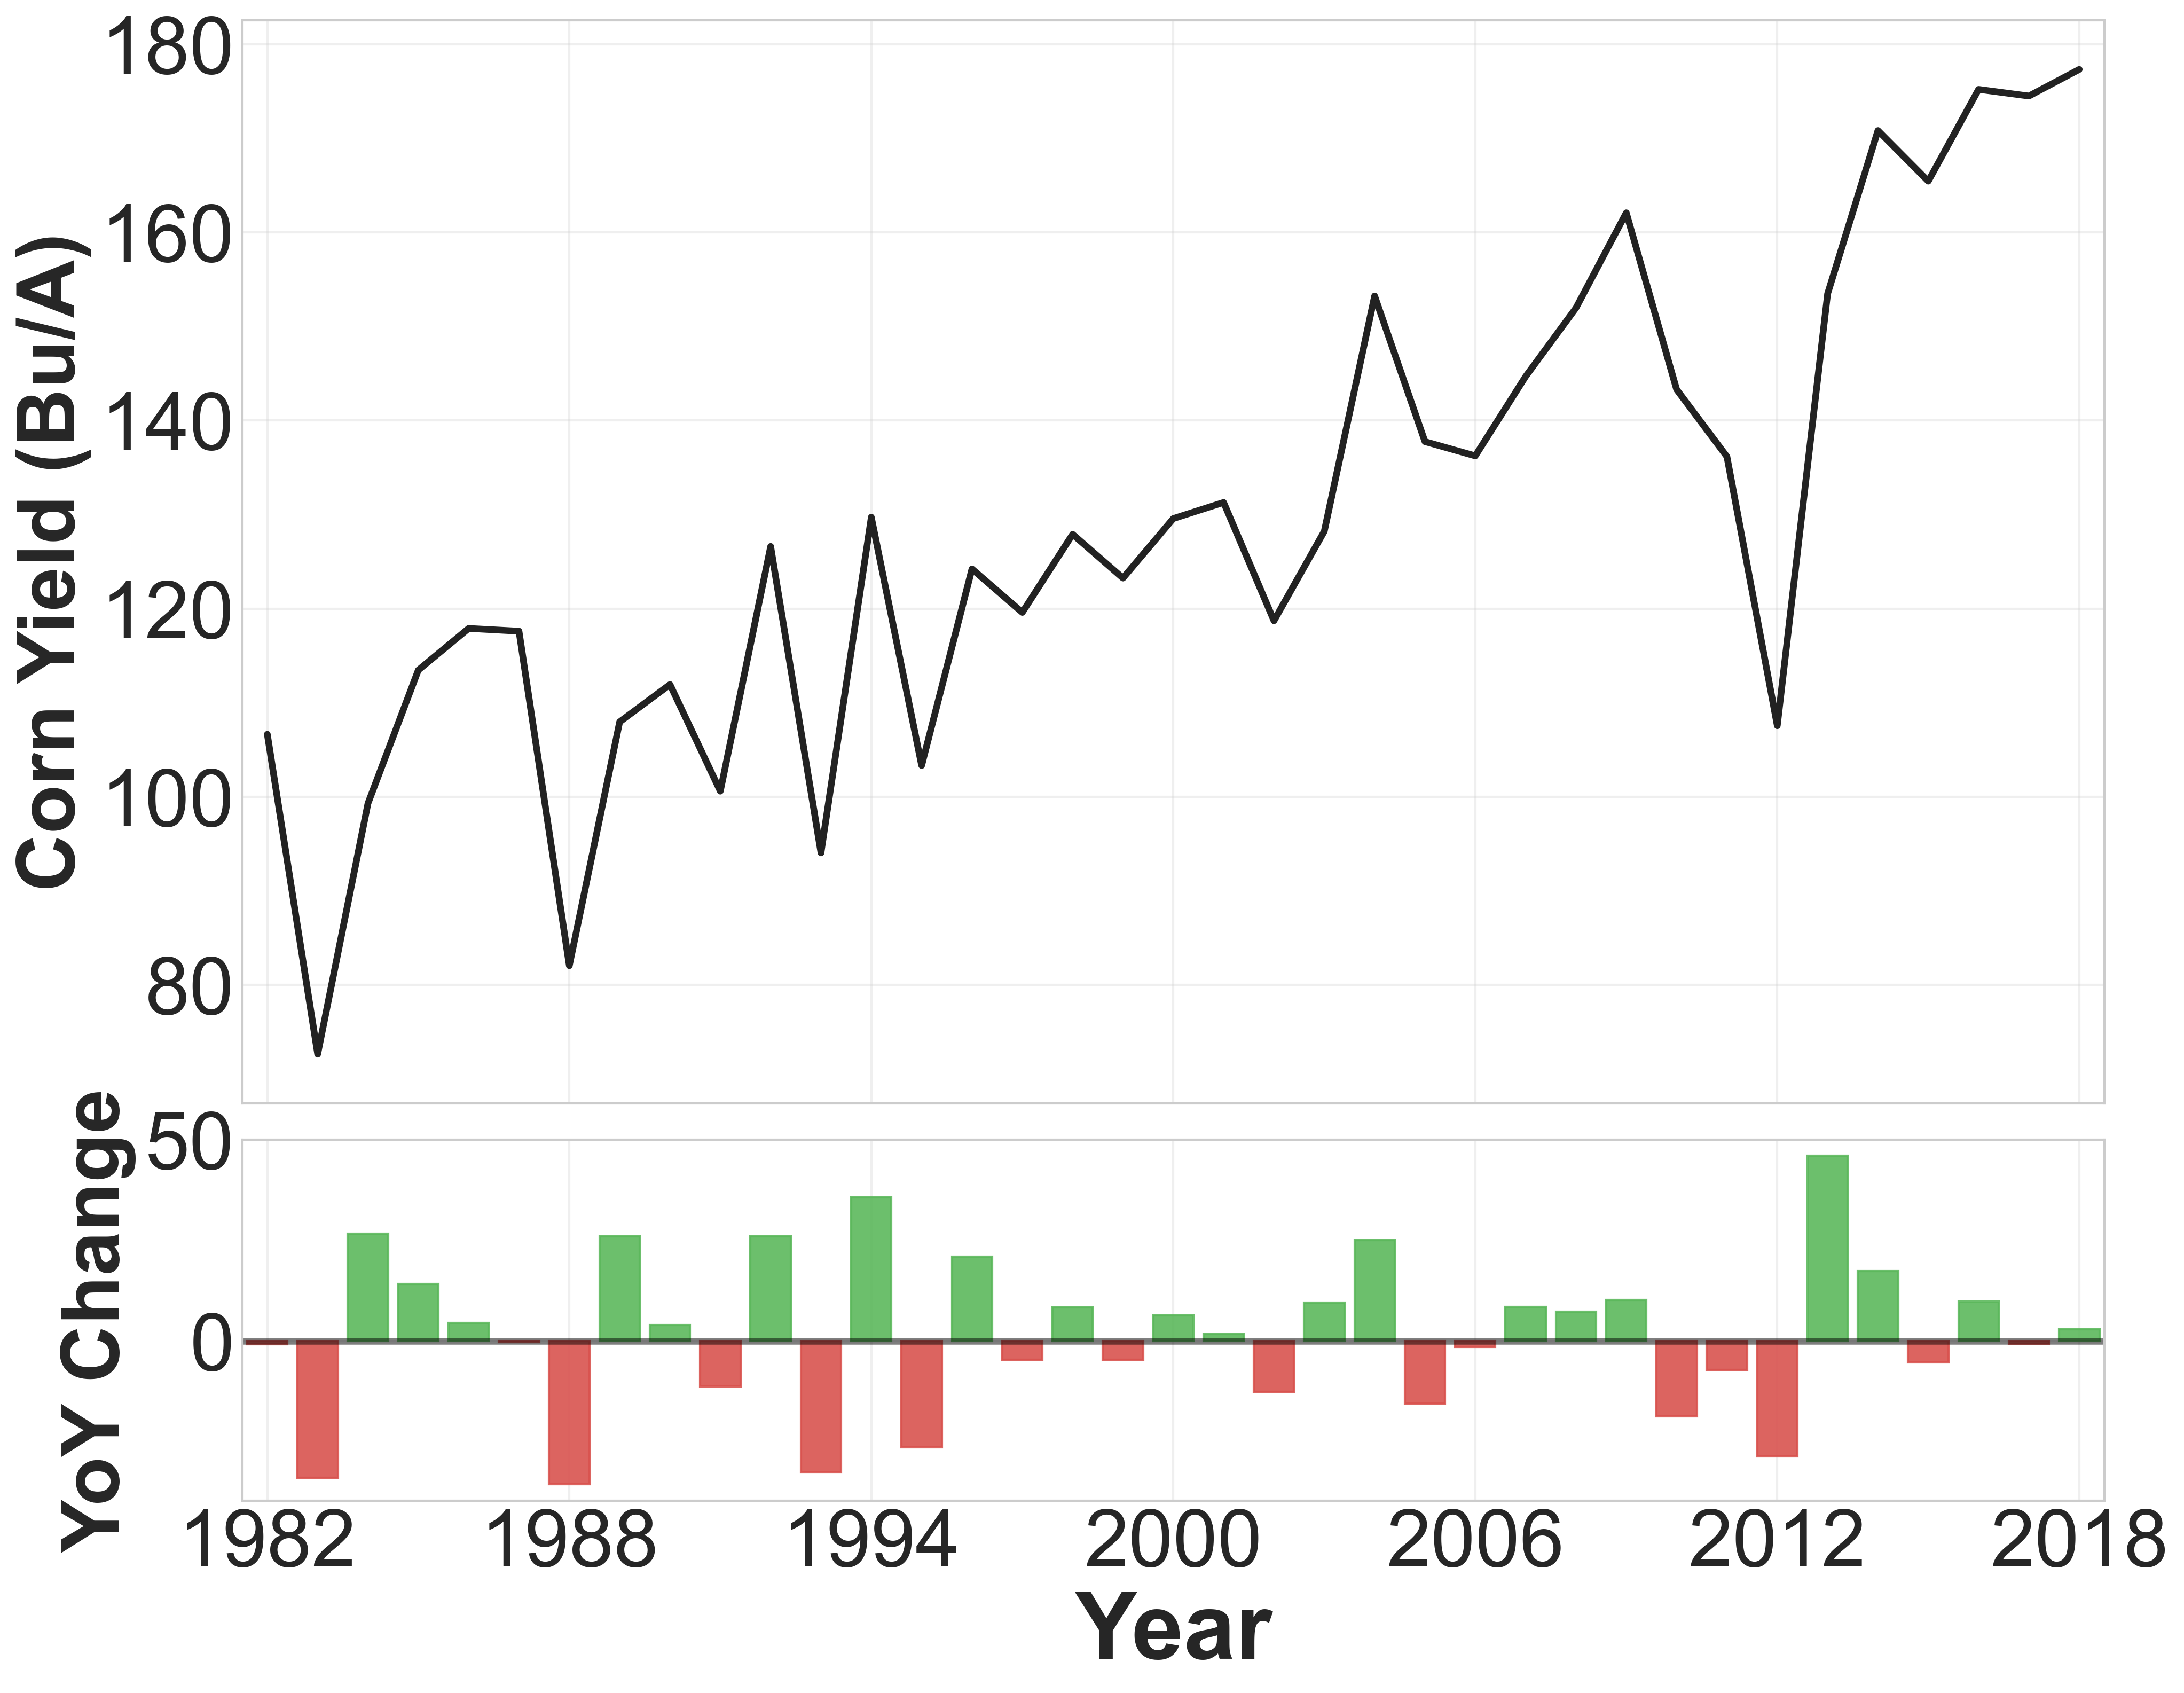

/var/folders/gl/0n1kdnzj6h9690m2clm0274h0000gn/T/ipykernel_86866/1361155864.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


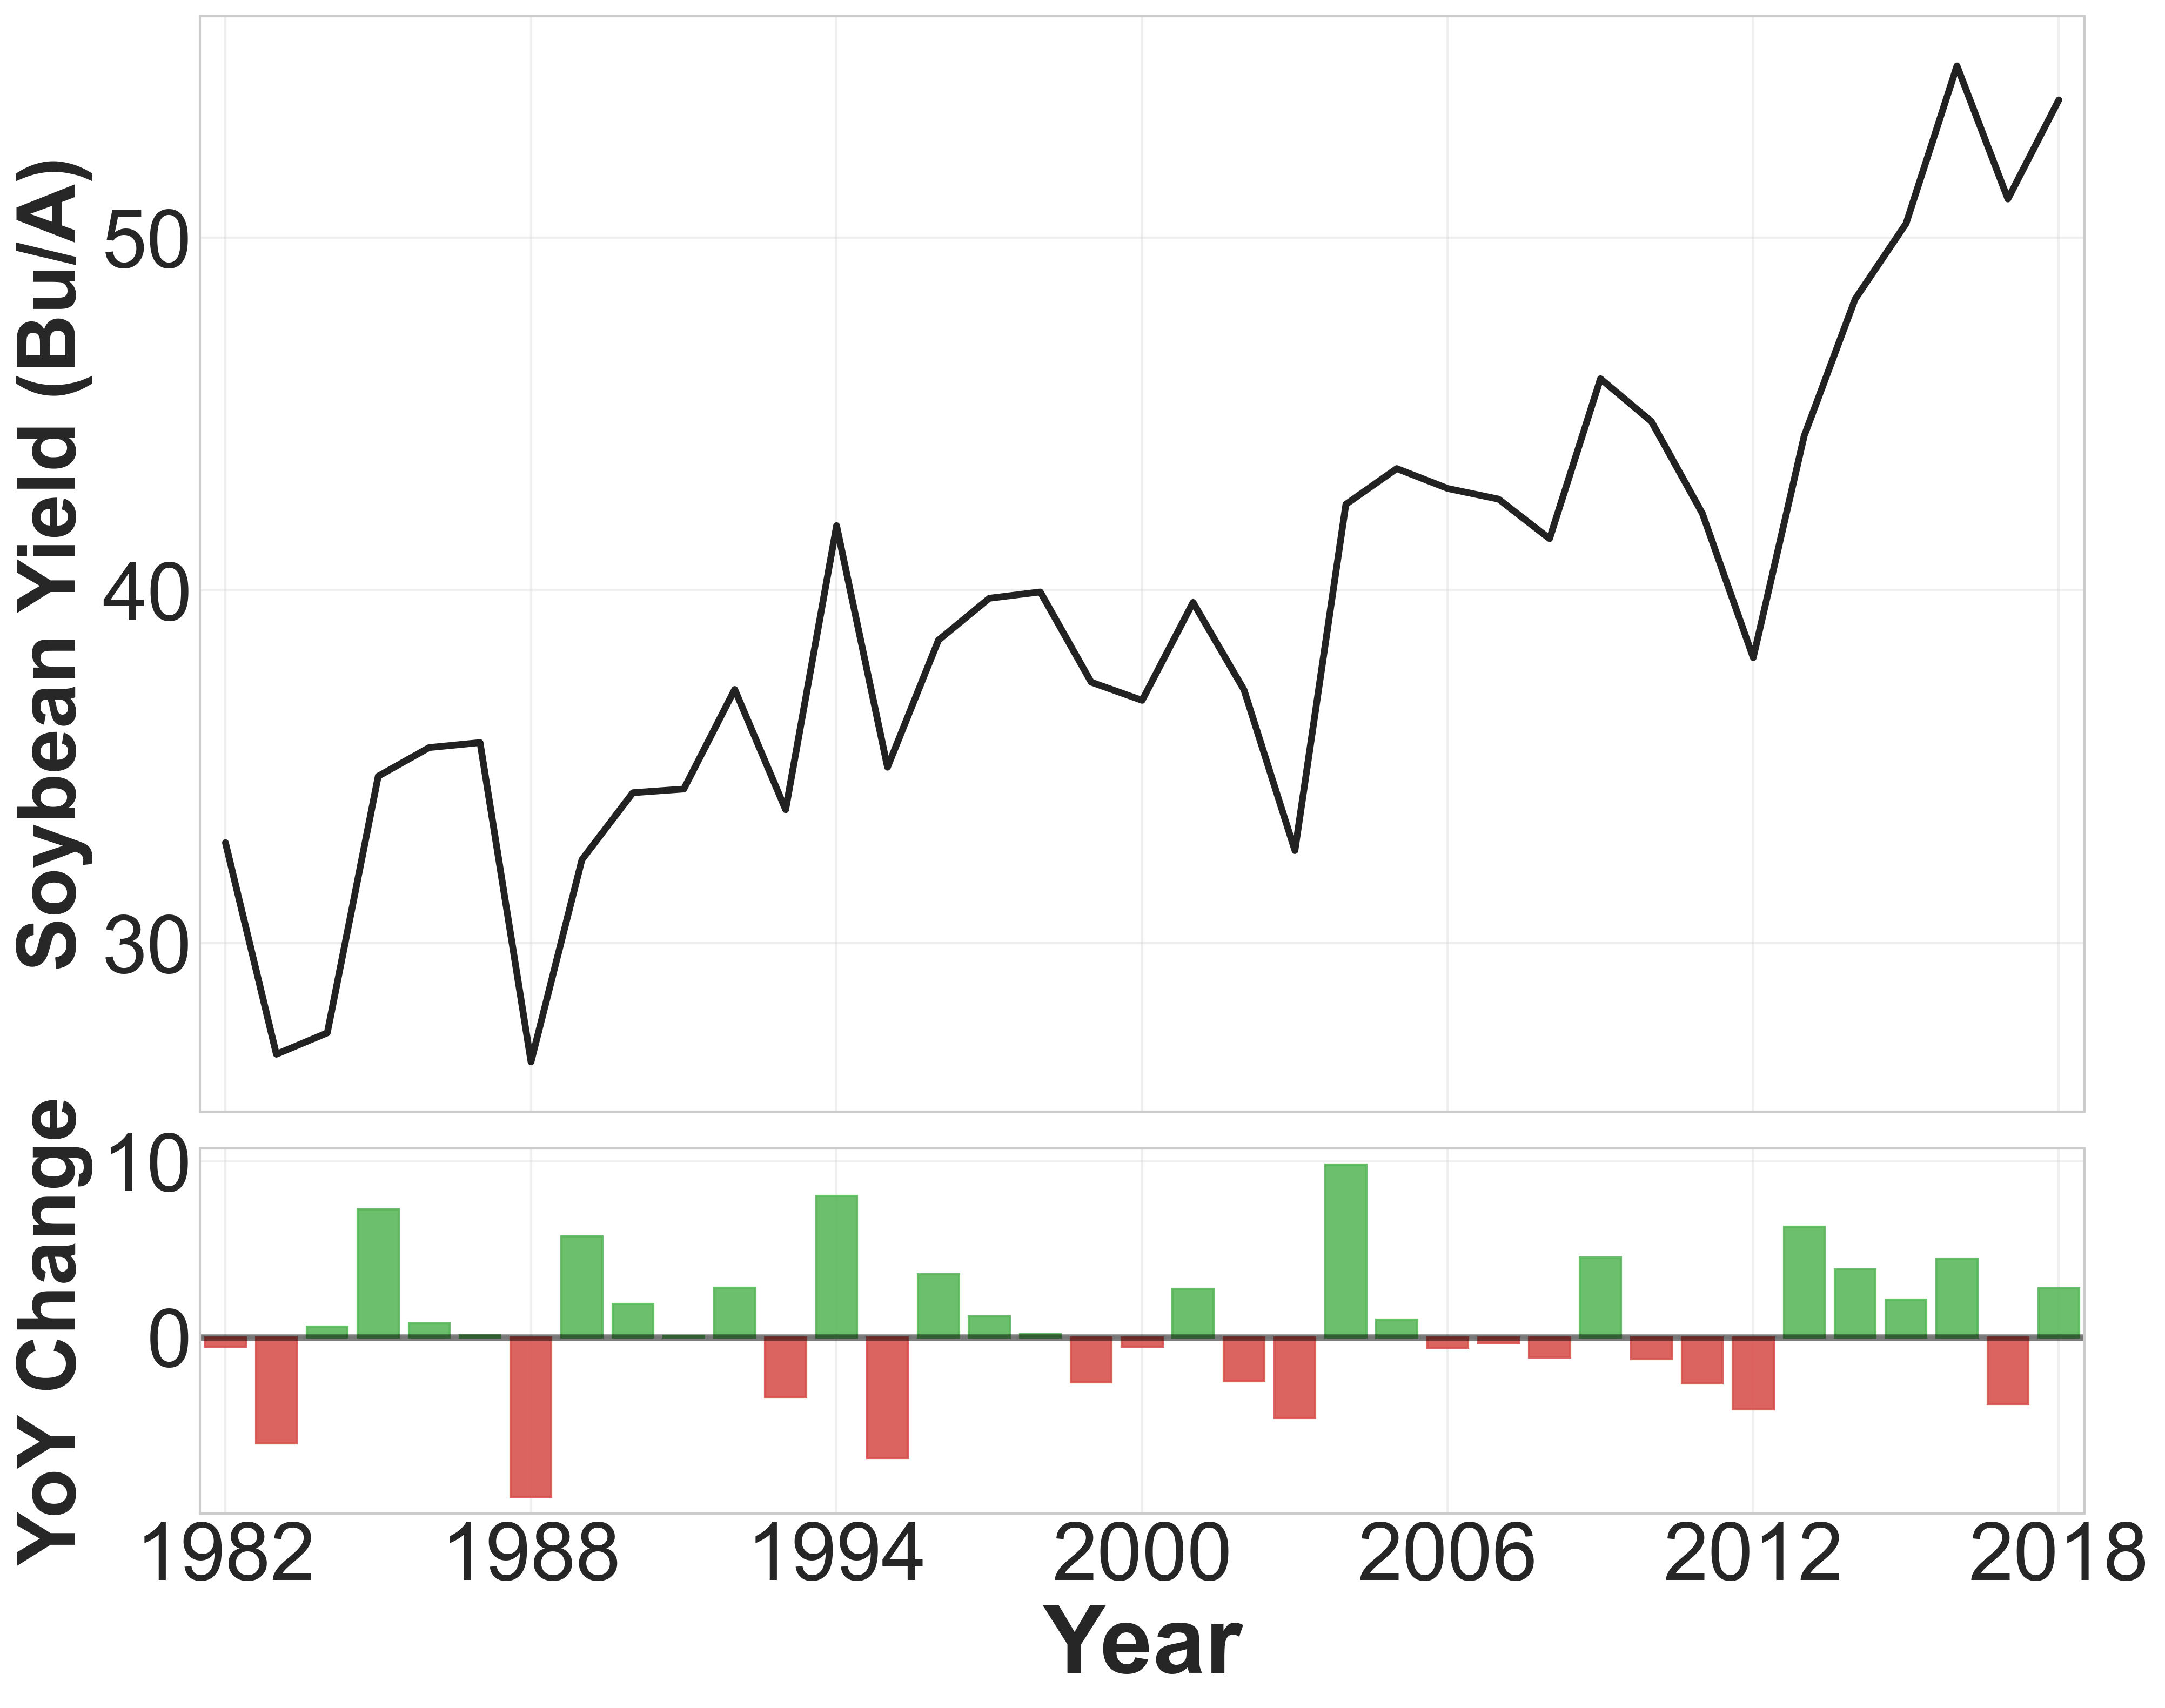

/var/folders/gl/0n1kdnzj6h9690m2clm0274h0000gn/T/ipykernel_86866/1361155864.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


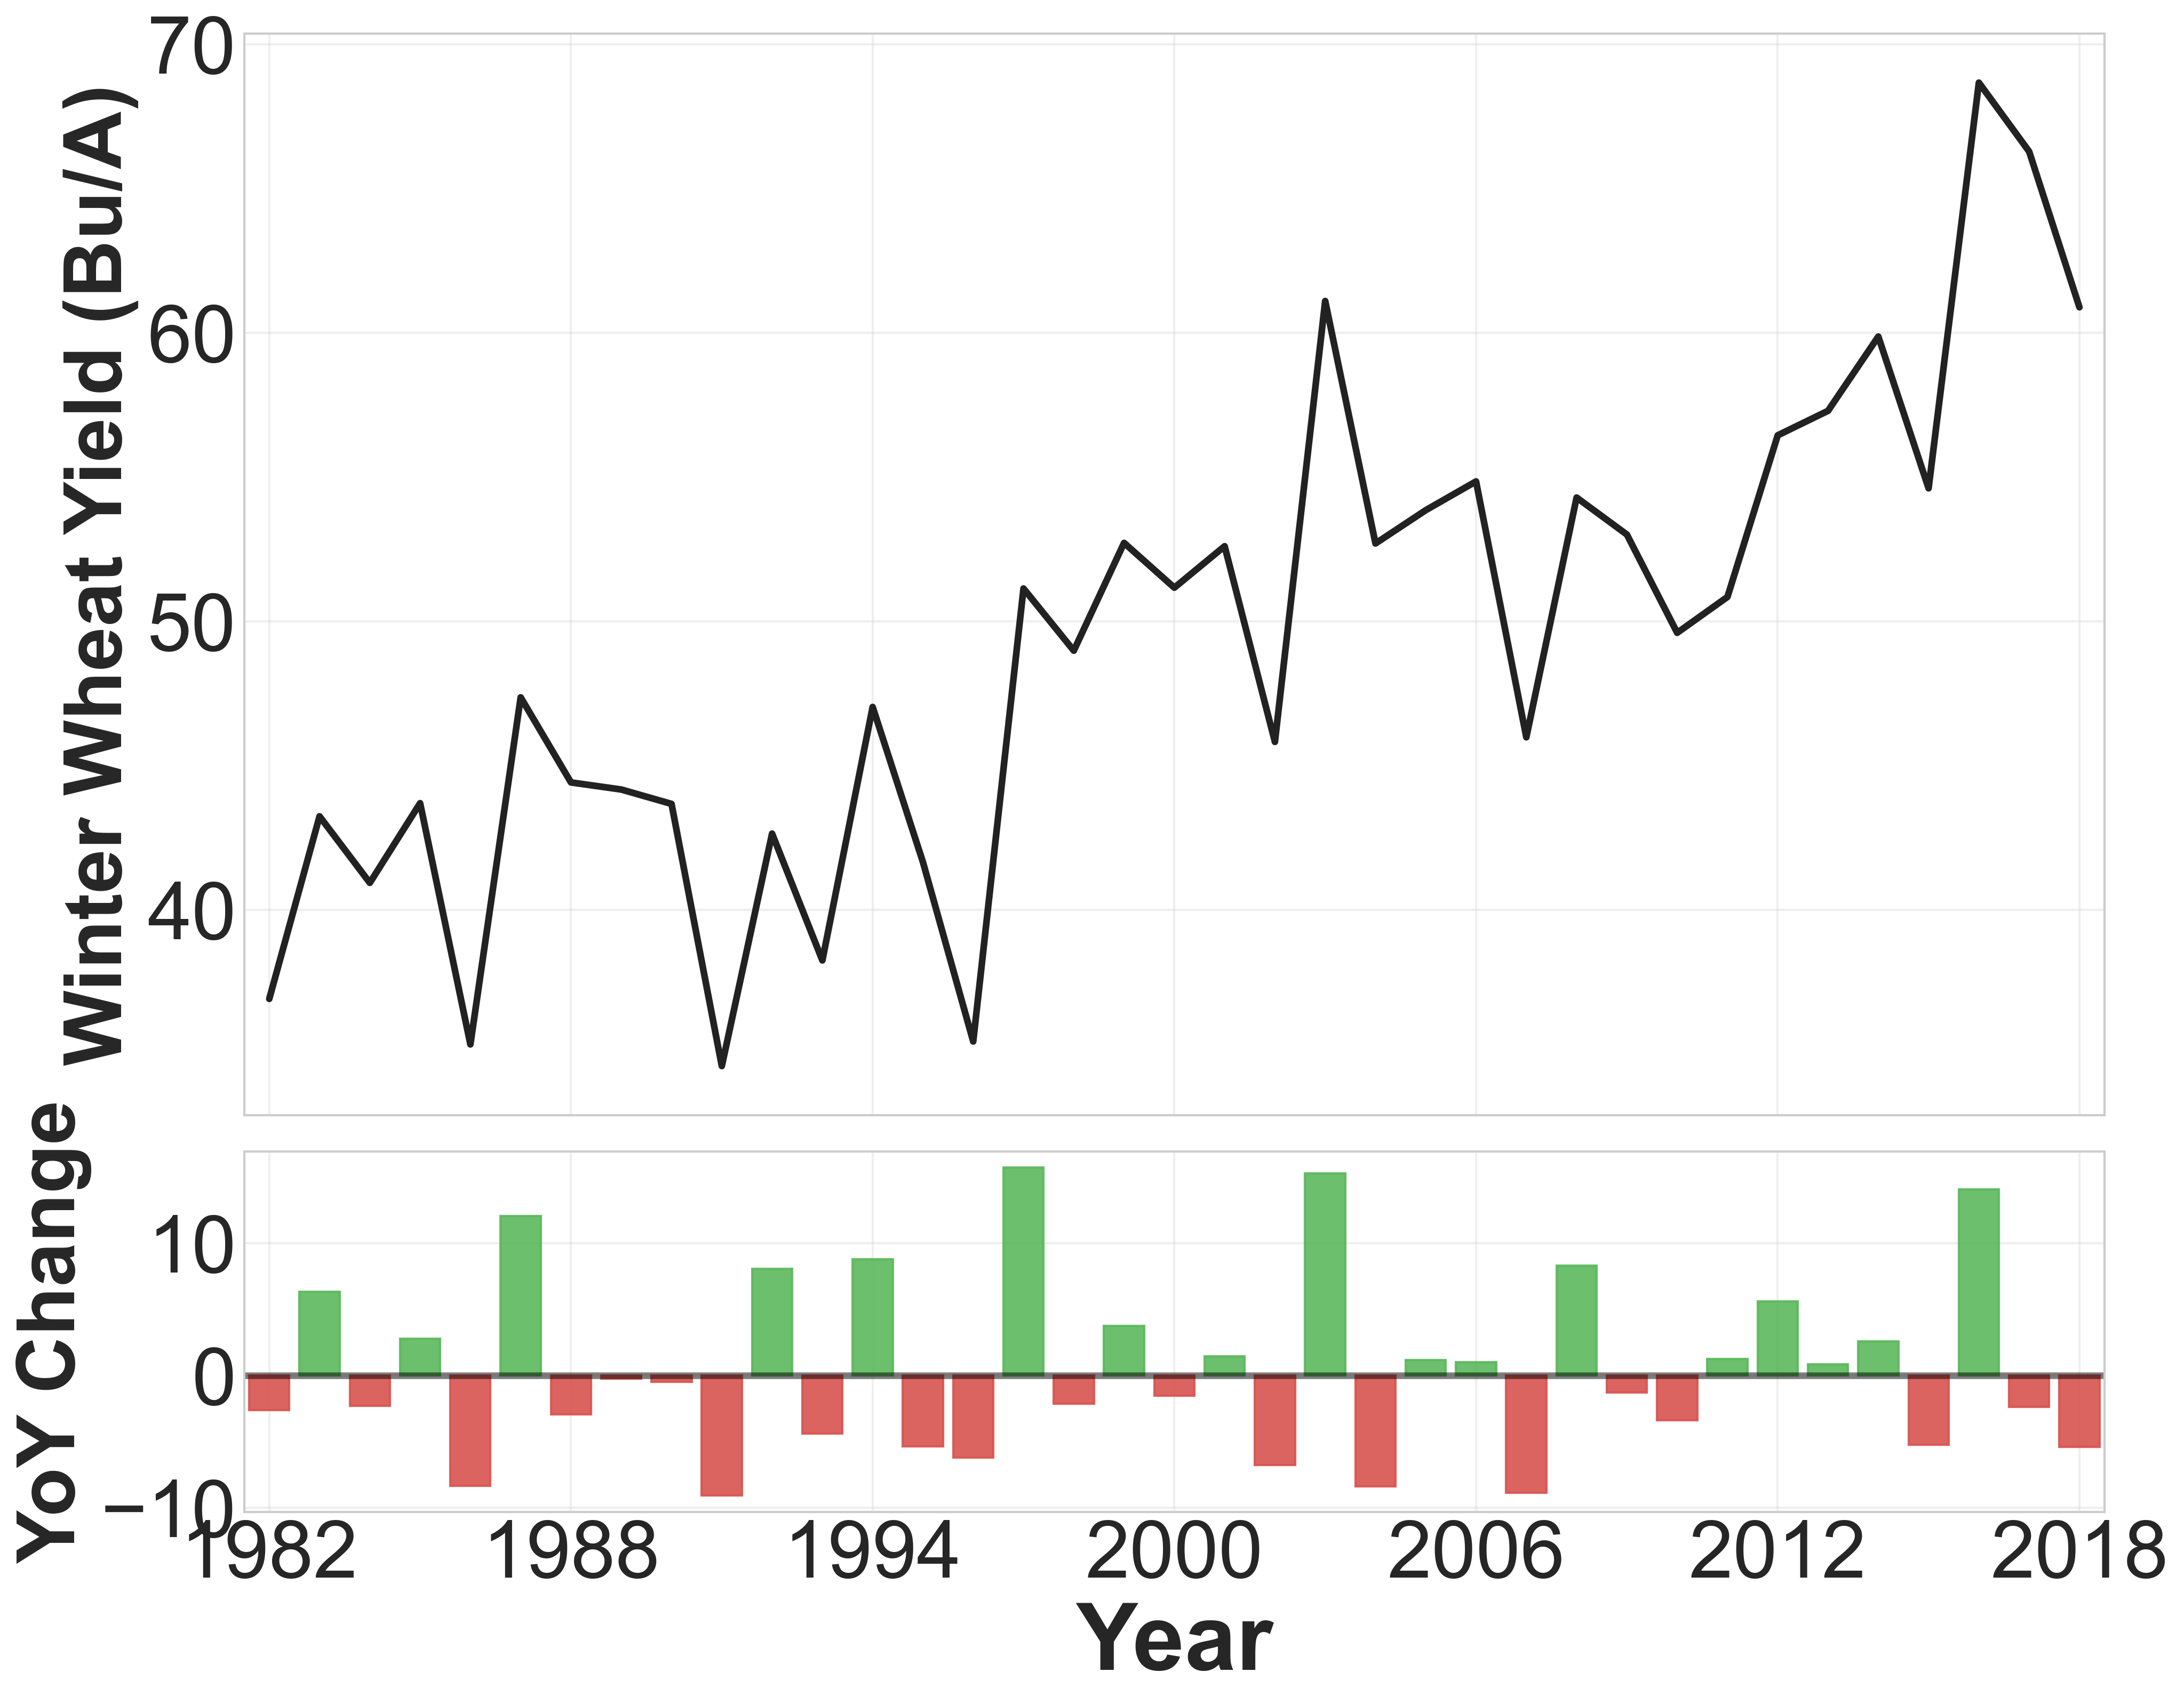

Plots saved with improved tick sizing and spacing.


In [3]:
# Compute YoY changes
yearly_means['corn_yield_change'] = yearly_means['corn_yield'].diff()
yearly_means['soybean_yield_change'] = yearly_means['soybean_yield'].diff()
yearly_means['winter_wheat_yield_change'] = yearly_means['winter_wheat_yield'].diff()
yearly_means_filtered = yearly_means[yearly_means['year'] >= 1982].reset_index(drop=True)

# Colors
main_line_color = '#222222'
positive_change_color = '#5CB85C'
negative_change_color = '#D9534F'

def plot_yield_and_change(df, yield_col, change_col, crop_name, file_name):
    fig, (ax, axb) = plt.subplots(2, 1, figsize=(15, 12), height_ratios=[3, 1], sharex=True, gridspec_kw={'hspace': 0.05})

    # Line plot
    ax.plot(df['year'], df[yield_col], color=main_line_color)
    ax.set_ylabel(f'{crop_name} Yield (Bu/A)', fontsize=36)
    
    # Set ticker font sizes to 1.5x (24 * 1.5 = 36)
    ax.tick_params(axis='both', which='major', labelsize=36)

    # Bar plot
    bars = axb.bar(df['year'], df[change_col], alpha=0.9, width=0.8)
    axb.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    axb.set_ylabel('YoY Change', fontsize=36)
    axb.set_xlabel('Year', fontsize=42)  # Set x-axis font to 1.5x (28 * 1.5 = 42)
    axb.set_xticks(np.arange(1982, 2020, 6))
    axb.set_xlim(1981.5, 2018.5)
    
    # Set ticker font sizes to 1.5x (24 * 1.5 = 36)
    axb.tick_params(axis='both', which='major', labelsize=36)

    for bar, height in zip(bars, df[change_col]):
        bar.set_color(positive_change_color if height >= 0 else negative_change_color)

    plt.tight_layout()
    # Save as PDF with tight bbox (cropped to content)
    pdf_file_name = file_name.replace('.png', '.pdf')
    plt.savefig(pdf_file_name, format='pdf', bbox_inches='tight')
    plt.show()

# Generate plots
plot_yield_and_change(yearly_means_filtered, 'corn_yield', 'corn_yield_change', 'Corn', '../data/latex/img/corn_yield_by_year_with_changes.pdf')
plot_yield_and_change(yearly_means_filtered, 'soybean_yield', 'soybean_yield_change', 'Soybean', '../data/latex/img/soybean_yield_by_year_with_changes.pdf')
plot_yield_and_change(yearly_means_filtered, 'winter_wheat_yield', 'winter_wheat_yield_change', 'Winter Wheat', '../data/latex/img/winter_wheat_yield_by_year_with_changes.pdf')

print("Plots saved with improved tick sizing and spacing.")
